### Daten laden & bereinigen

In [156]:
#datensatz laden

import pandas as pd #dataframes und datetime
import numpy as np #tageszeit berechnen
import matplotlib.pyplot as plt #basis-diagramme
import matplotlib.dates as mdates  # für Datumsformatierung in Zeitstrahl
import calendar # Monatsnummern in Monatsnamen umwandeln
import seaborn as sns #heatmap
import holidays #für feiertagsanalyse

path = (r"C:\Users\Admin\Documents\Projekt_Ufo\Projekt_UFO\data\data_clean\ufo_sightings_scrubbed_clean.csv")
ufo_sightings_df = pd.read_csv(path)

ufo_sightings_df



,datetime,city,state,country,shape,duration_seconds,duration_hour_min,comments,date_posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [157]:
#spalte datetime laden und ins richtige format bringen
datetime_clean = pd.to_datetime(ufo_sightings_df["datetime"], format="mixed", errors="coerce")

print(datetime_clean)

# format mixed -> alle angaben (mit und ohne sekunden) können verwendet werden
# errors coerce -> erstellt NaNs aus allen unpassenden daten

0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: datetime, Length: 80332, dtype: datetime64[ns]


### Jahre ###

In [158]:
#nach jahren filtern

ufo_sightings_df["years"] = datetime_clean.dt.year
years_df = ufo_sightings_df["years"]

print(years_df)


0        1949
1        1949
2        1955
3        1956
4        1960
         ... 
80327    2013
80328    2013
80329    2013
80330    2013
80331    2013
Name: years, Length: 80332, dtype: int32


In [159]:
# sichtungen pro jahr
sightings_per_year = ufo_sightings_df.groupby("years").size()
print(sightings_per_year)

years
1906       1
1910       2
1916       1
1920       1
1925       1
        ... 
2010    4283
2011    5107
2012    7356
2013    7038
2014    2260
Length: 87, dtype: int64


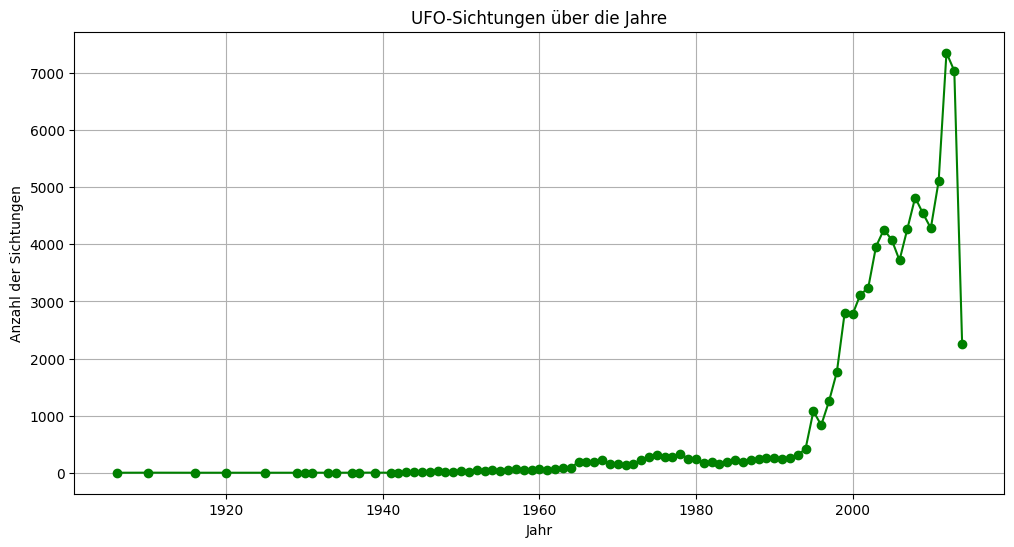

In [160]:
# grafik alle
sightings_per_year.plot(kind='line', figsize=(12, 6), marker='o', color='green', linestyle='-')
plt.title('UFO-Sichtungen über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Sichtungen')
plt.grid(True)  # Gitternetzlinien hinzufügen
plt.show()

In [161]:
# filter close up ab 1990
close_up_df = ufo_sightings_df[ufo_sightings_df["years"] >= 1990]
# sichtungen close up
sightings_close_up = close_up_df.groupby("years").size()

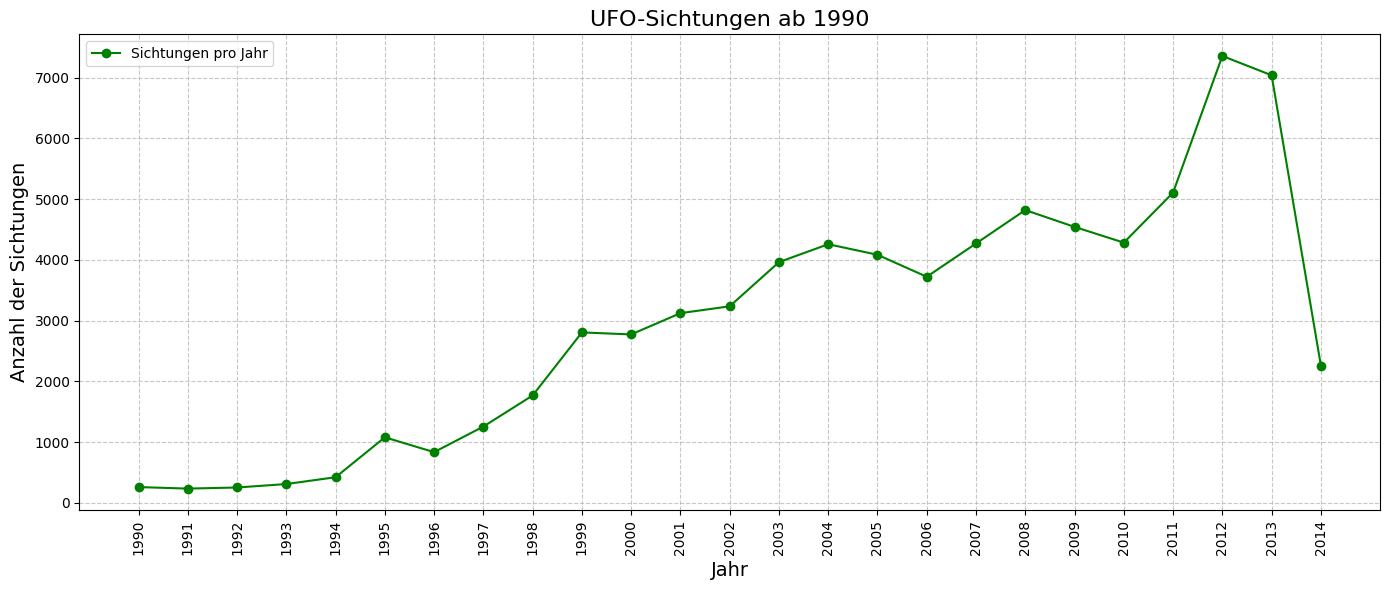

In [162]:
plt.figure(figsize=(14, 6))  # Größeres Diagramm für bessere Lesbarkeit
plt.plot(sightings_close_up.index, sightings_close_up.values, marker='o', color='green', linestyle='-', label='Sichtungen pro Jahr')

# Füge für jedes Jahr einen Strich auf der x-Achse hinzu
plt.xticks(sightings_close_up.index, rotation=90)  # Striche für jedes Jahr, Beschriftungen um 90 Grad gedreht

# Beschriftungen und Titel
plt.title('UFO-Sichtungen ab 1990', fontsize=16)
plt.xlabel('Jahr', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Gitternetzlinien hinzufügen
plt.legend()
plt.tight_layout()  # Verbessert das Layout, um Überlappungen zu vermeiden
plt.show()

### Monate ###

In [163]:
# filtern nach monaten
ufo_sightings_df["months"] = datetime_clean.dt.month
months_df = ufo_sightings_df["months"]

print(months_df)


0        10
1        10
2        10
3        10
4        10
         ..
80327     9
80328     9
80329     9
80330     9
80331     9
Name: months, Length: 80332, dtype: int32


In [164]:
# sichtungen pro monat
sightings_per_month =  ufo_sightings_df.groupby("months").size()
print(sightings_per_month)

months
1     5689
2     4667
3     5449
4     5527
5     5292
6     8130
7     9542
8     8638
9     7588
10    7406
11    6740
12    5664
dtype: int64


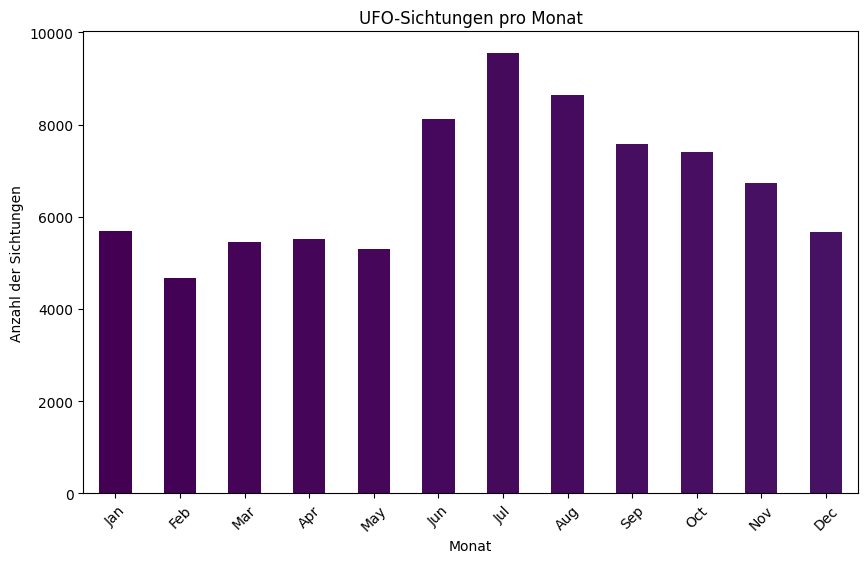

In [ ]:
# Monatsnummern in Monatsnamen umwandeln
sightings_per_month.index = sightings_per_month.index.map(lambda x: calendar.month_abbr[x])

# Visualisiere die Daten mit einem Balkendiagramm
sightings_per_month.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('UFO-Sichtungen pro Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Sichtungen')
plt.xticks(rotation=45)  # Monatsnamen um 45 Grad drehen für bessere Lesbarkeit
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\3062383838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sightings_per_month.index, y=sightings_per_month.values, palette="viridis")


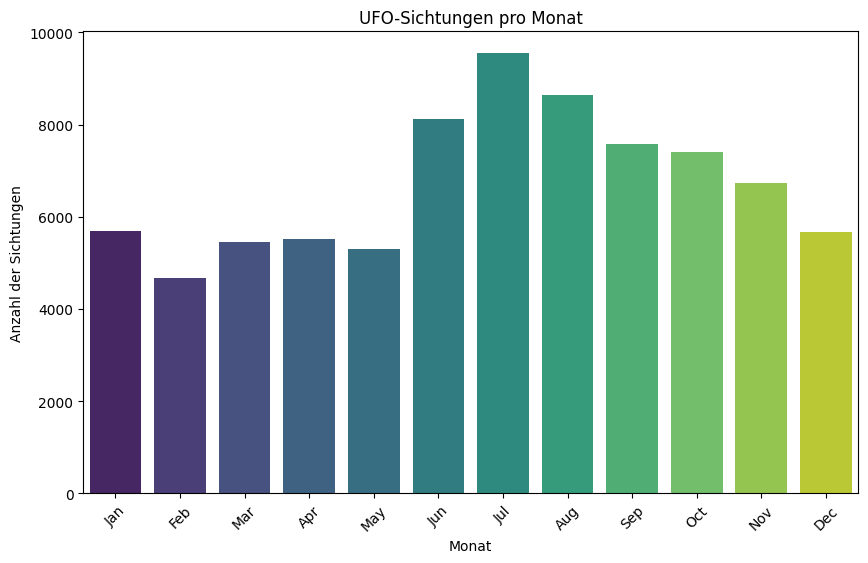

In [ ]:
# Seaborn-Version
plt.figure(figsize=(10, 6))
sns.barplot(x=sightings_per_month.index, y=sightings_per_month.values, palette="viridis")
plt.title('UFO-Sichtungen pro Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Sichtungen')
plt.xticks(rotation=45)
plt.show()

### Jahreszeiten

In [166]:
# in jahreszeiten einteilen

# Funktion zur Bestimmung der Jahreszeit
def get_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "sommer"
    else:
        return "autumn"
    

# Monat extrahieren und Jahreszeit zuweisen
ufo_sightings_df["season"] = ufo_sightings_df["months"].map(get_season)
seasons_df = ufo_sightings_df["season"]

print(seasons_df)


0        autumn
1        autumn
2        autumn
3        autumn
4        autumn
          ...  
80327    autumn
80328    autumn
80329    autumn
80330    autumn
80331    autumn
Name: season, Length: 80332, dtype: object


In [167]:
#sichtungen pro jahreszeit 
sightings_per_season = ufo_sightings_df.groupby("season").size().reset_index(name="sightings")
print(sightings_per_season)

   season  sightings
0  autumn      21734
1  sommer      26310
2  spring      16268
3  winter      16020


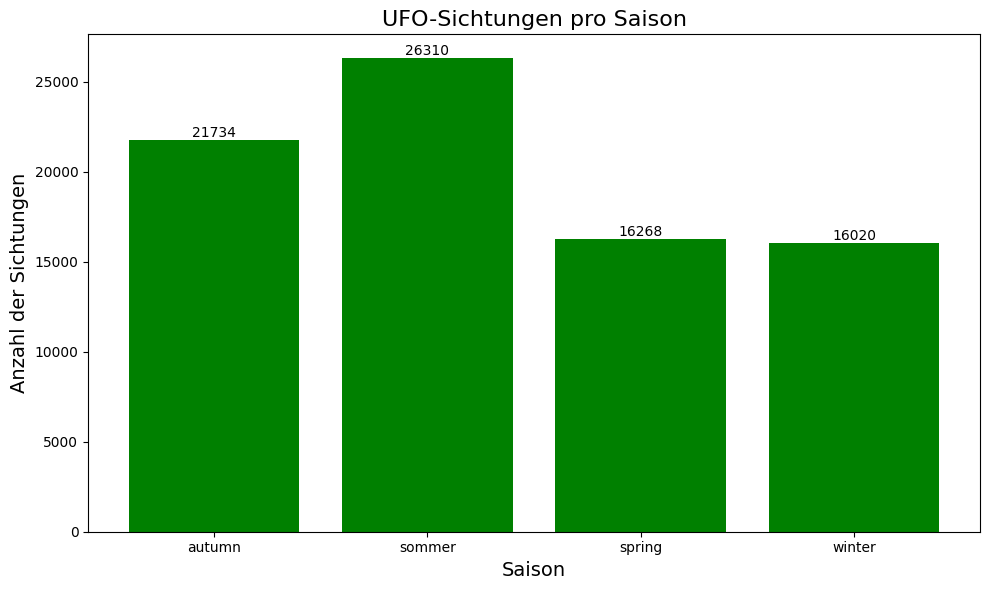

In [168]:
# Plot erstellen
plt.figure(figsize=(10, 6))  # Größe des Diagramms anpassen
plt.bar(sightings_per_season['season'], sightings_per_season['sightings'], color='green')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('UFO-Sichtungen pro Saison', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)

# Optional: Werte über den Balken anzeigen
for i, value in enumerate(sightings_per_season['sightings']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Diagramm anzeigen
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\1110444799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='sightings', data=sightings_per_season, palette="viridis")


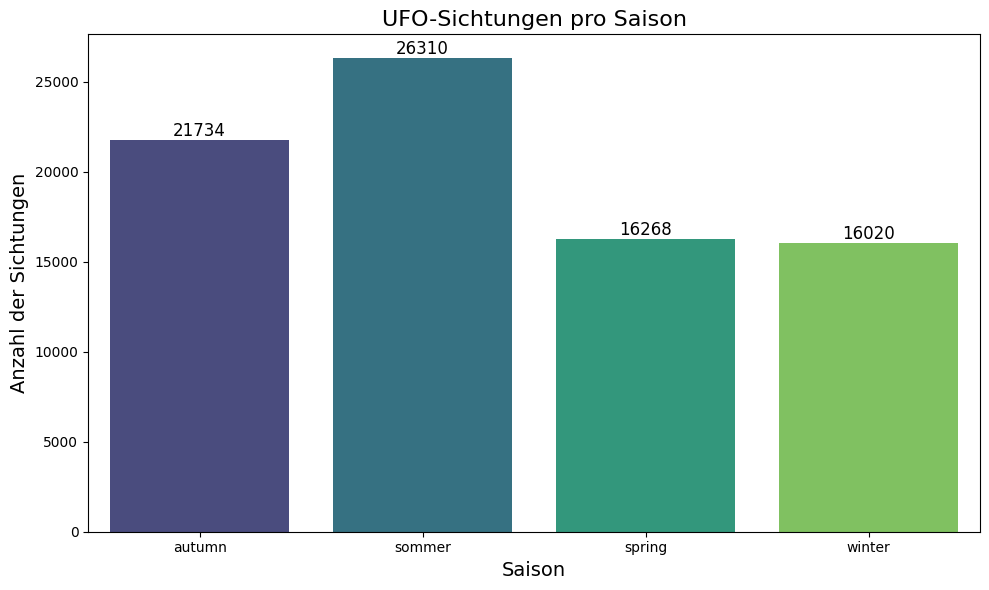

In [188]:
# Seaborn-Version

plt.figure(figsize=(10, 6))  # Größe des Diagramms anpassen
sns.barplot(x='season', y='sightings', data=sightings_per_season, palette="viridis")

# Titel und Achsenbeschriftungen hinzufügen
plt.title('UFO-Sichtungen pro Saison', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)

# Optional: Werte über den Balken anzeigen
for i, value in enumerate(sightings_per_season['sightings']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

### Tage (Datum) ###

In [169]:
#nach Tagen filtern

ufo_sightings_df["days"] = datetime_clean.dt.day


In [170]:
sightings_per_day = ufo_sightings_df.groupby("days").size()
print(sightings_per_day)

days
1     5546
2     2255
3     2361
4     3108
5     2502
6     2323
7     2394
8     2301
9     2187
10    2896
11    2323
12    2577
13    2501
14    2456
15    5883
16    2509
17    2282
18    2307
19    2355
20    3029
21    2245
22    2323
23    2284
24    2293
25    2433
26    2048
27    2042
28    2283
29    1997
30    2554
31    1735
dtype: int64


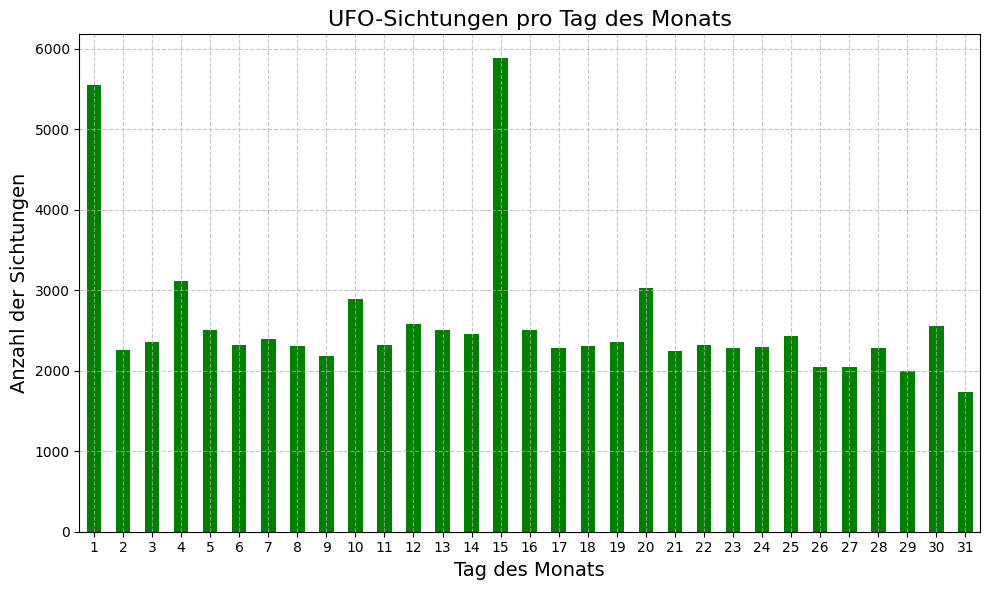

In [171]:
# Finde den Tag mit den meisten Sichtungen
most_sightings_day = sightings_per_day.idxmax()
most_sightings_count = sightings_per_day.max()

# Visualisiere die Sichtungen pro Tag
plt.figure(figsize=(10, 6))
sightings_per_day.plot(kind='bar', color='green')
plt.title('UFO-Sichtungen pro Tag des Monats', fontsize=16)
plt.xlabel('Tag des Monats', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)
plt.xticks(rotation=0)  # Tage horizontal darstellen
plt.grid(True, linestyle='--', alpha=0.7)  # Gitternetzlinien hinzufügen
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\3153765882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sightings_per_day.index, y=sightings_per_day.values, palette="viridis")


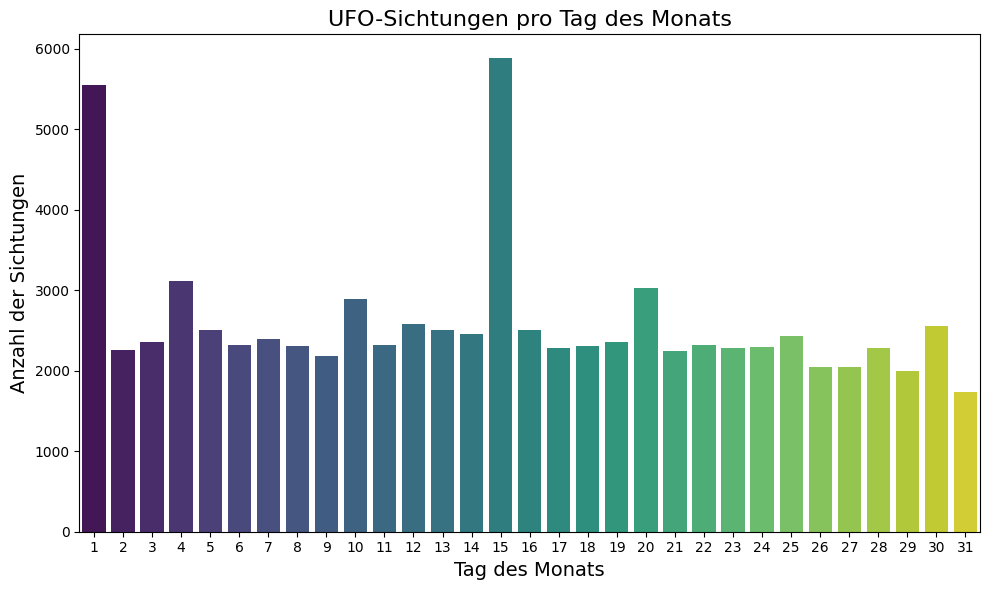

In [ ]:
# Seaborn-Version

plt.figure(figsize=(10, 6))
sns.barplot(x=sightings_per_day.index, y=sightings_per_day.values, palette="viridis")
plt.title('UFO-Sichtungen pro Tag des Monats', fontsize=16)
plt.xlabel('Tag des Monats', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)
plt.tight_layout()
plt.show()


### Tage (Wochentag) ###

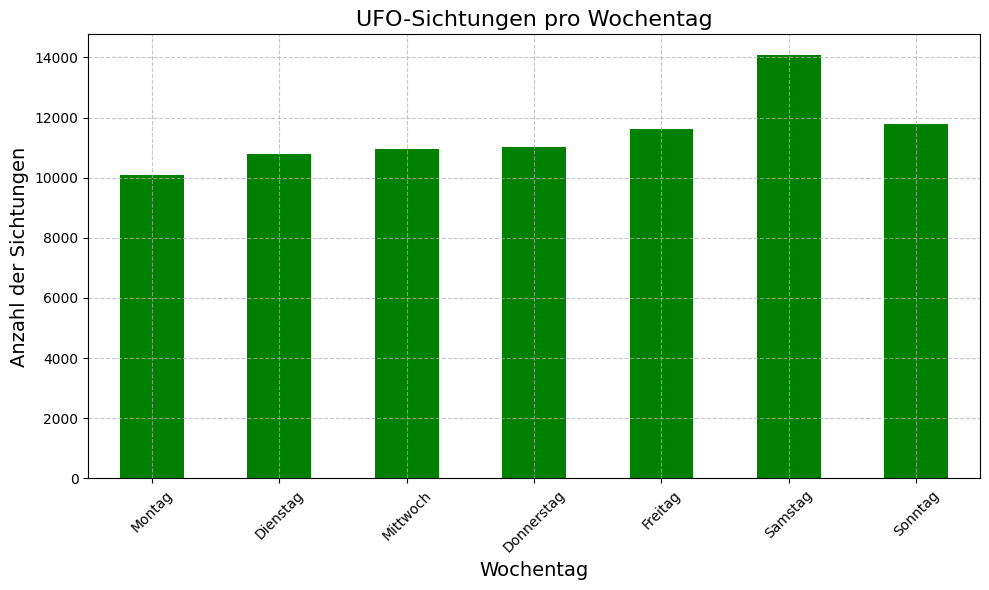

In [172]:
#nach wochentag filtern
ufo_sightings_df["weekday"] = datetime_clean.dt.weekday

# tage benennen zur übersicht
weekday_names = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]
ufo_sightings_df["weekday_name"] = ufo_sightings_df["weekday"].map(lambda x: weekday_names[x])


# sichtung wochentag
sightings_per_weekday = ufo_sightings_df.groupby("weekday_name").size()

# richtige reihenfolge via weekday_names reinbringen
sightings_per_weekday = sightings_per_weekday.reindex(weekday_names)


# Visualisiere die Sichtungen pro Wochentag
sightings_per_weekday.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('UFO-Sichtungen pro Wochentag', fontsize=16)
plt.xlabel('Wochentag', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\2601050858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sightings_per_weekday.index, y=sightings_per_weekday.values, palette="viridis")


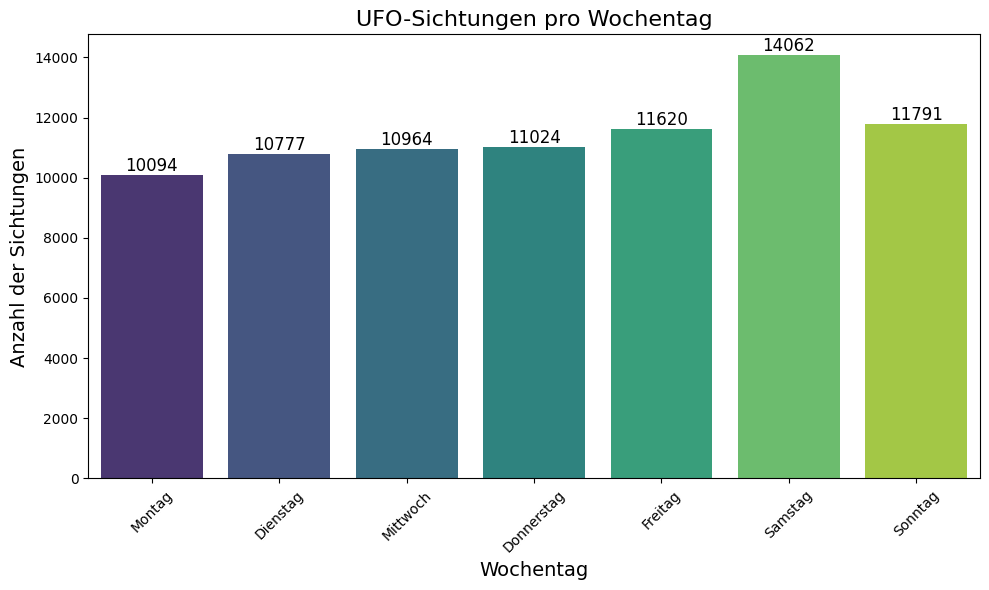

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sightings_per_weekday.index, y=sightings_per_weekday.values, palette="viridis")

# Titel und Achsenbeschriftungen hinzufügen
plt.title('UFO-Sichtungen pro Wochentag', fontsize=16)
plt.xlabel('Wochentag', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)

# Optional: Werte über den Balken anzeigen
for i, value in enumerate(sightings_per_weekday.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Diagramm anzeigen
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tageszeit

In [173]:
# stunden ziehen
hour = datetime_clean.dt.hour

# Tageszeit-Kategorisierung
conditions = [
    (hour >= 6) & (hour < 12),   # Vormittag (Tag)
    (hour >= 12) & (hour < 14),  # Mittag
    (hour >= 14) & (hour < 18),  # Nachmittag (Tag)
    (hour >= 18) | (hour < 6)    # Nacht
]

# Labels für die Kategorien
labels = ["Vormittag", "Mittag", "Nachmittag", "Nacht"]

# neue Spalte ins df
ufo_sightings_df["zeitkategorie"] = np.select(conditions, labels, default="Unbekannt")

print(ufo_sightings_df[["datetime", "zeitkategorie"]].head())

              datetime zeitkategorie
0  1949-10-10 20:30:00         Nacht
1  1949-10-10 21:00:00         Nacht
2  1955-10-10 17:00:00    Nachmittag
3  1956-10-10 21:00:00         Nacht
4  1960-10-10 20:00:00         Nacht


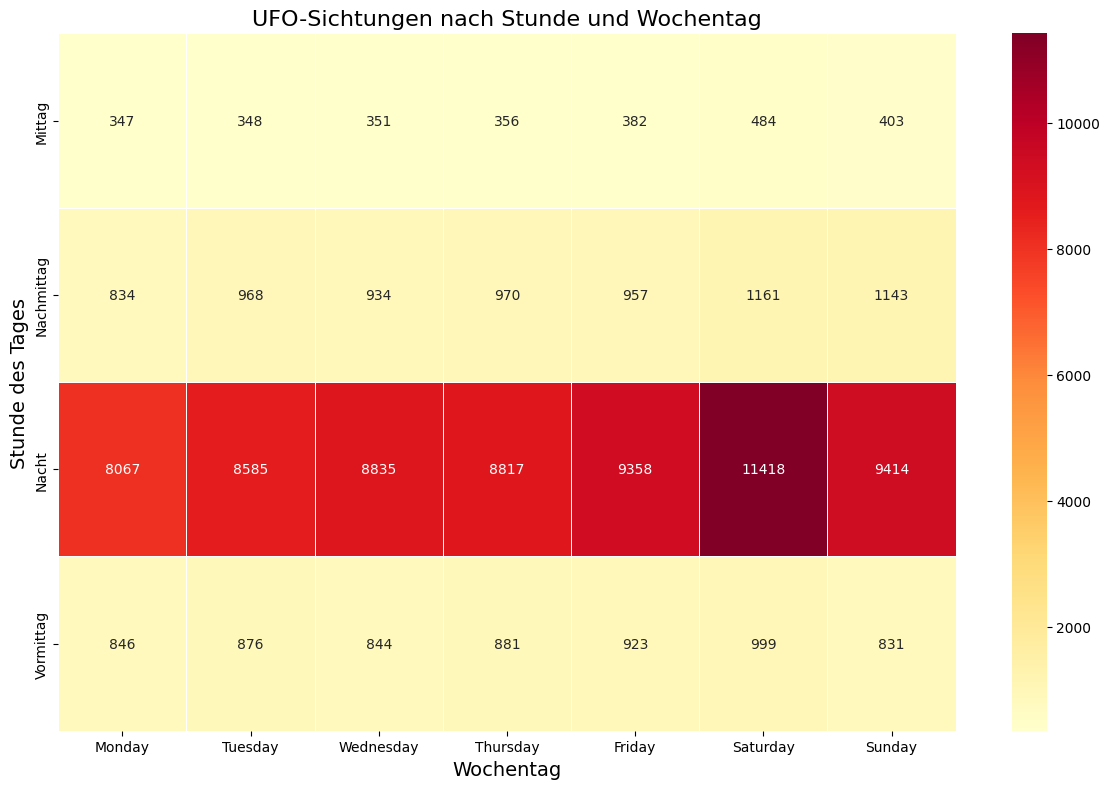

In [174]:


#stunde und wochentag ziehen
ufo_sightings_df["hour"] = datetime_clean.dt.hour
ufo_sightings_df["weekday"] = datetime_clean.dt.day_name()  # Name des Wochentags

# Pivot-Tabelle für Heatmap
heatmap_data = ufo_sightings_df.pivot_table(
    index="zeitkategorie",         
    columns="weekday",    
    values="datetime",    # Werte für die Heatmap (z. B. Anzahl der Sichtungen)
    aggfunc="count",      # Anzahl der Sichtungen
    fill_value=0          # Fülle fehlende Werte mit 0
)

# zur übersicht hier nochmal wochentage benennen
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data[weekday_names]

# Erstelle die Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d", linewidths=0.5)
plt.title("UFO-Sichtungen nach Stunde und Wochentag", fontsize=16)
plt.xlabel("Wochentag", fontsize=14)
plt.ylabel("Stunde des Tages", fontsize=14)
plt.tight_layout()
plt.show()

### Zusammenhang Tag und Monat

In [175]:
ufo_sightings_df["datetime"] = datetime_clean #in dt-objekt umwandeln

ufo_sightings_df["datetime"] = ufo_sightings_df["datetime"].dt.date #nur das date ziehen
date_counts = ufo_sightings_df["datetime"].value_counts() # valuecounts ziehen

top10_date_counts = date_counts.head(10)
print(top10_date_counts)

datetime
2010-07-04    201
2012-07-04    182
1999-11-16    180
2013-07-04    175
2011-07-04    146
2009-09-19    126
2014-01-01     93
2013-12-31     89
2004-10-31     85
2009-07-04     84
Name: count, dtype: int64


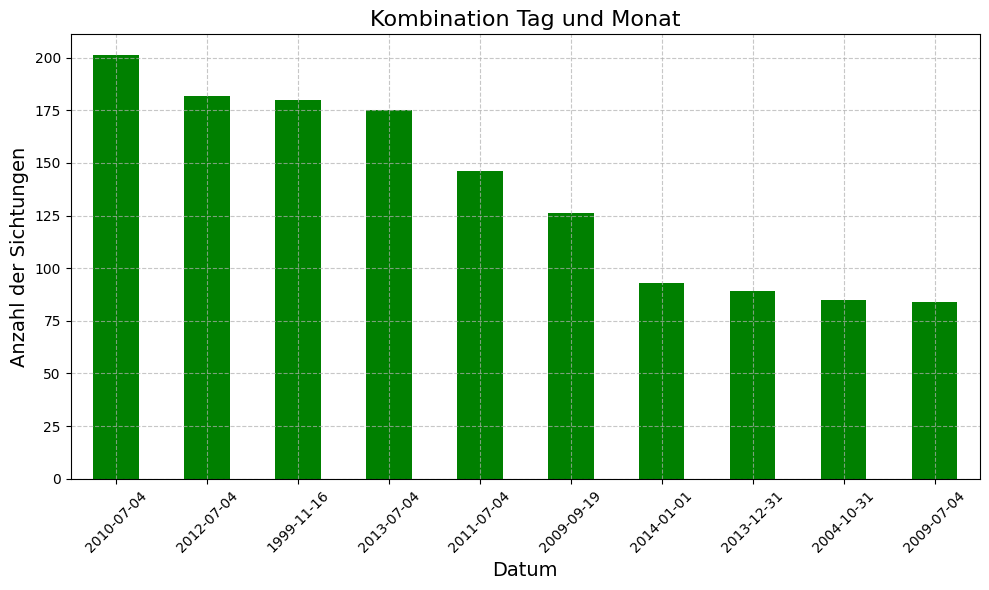

In [176]:
# Visualisierung
top10_date_counts.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Kombination Tag und Monat', fontsize=16)
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\2158300856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_date_counts.index, y=top10_date_counts.values, palette="viridis")


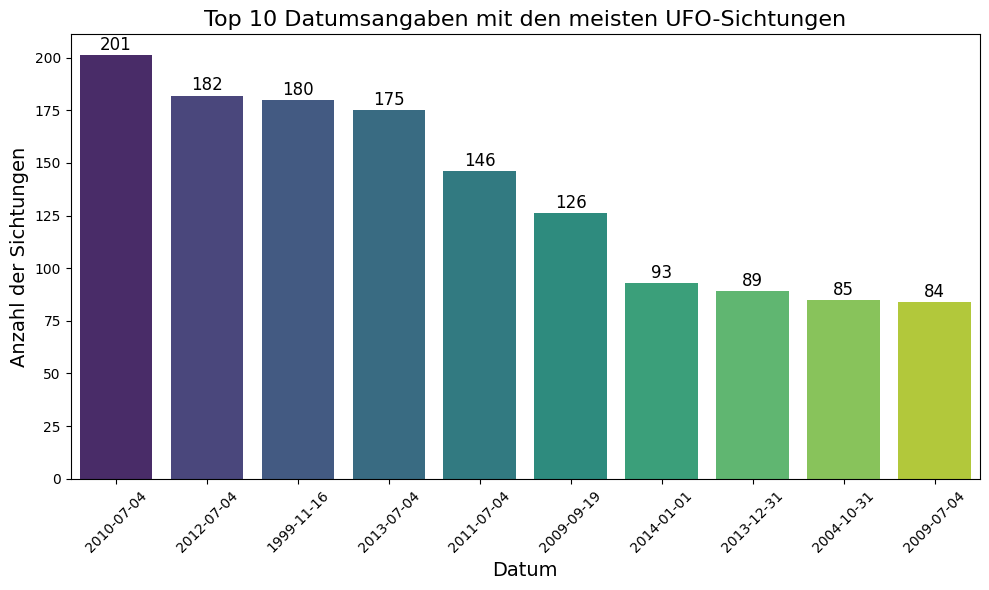

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_date_counts.index, y=top10_date_counts.values, palette="viridis")

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Top 10 Datumsangaben mit den meisten UFO-Sichtungen', fontsize=16)
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Anzahl der Sichtungen', fontsize=14)

# Optional: Werte über den Balken anzeigen
for i, value in enumerate(top10_date_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Diagramm anzeigen
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Entwicklung Sichtungen Länder über die Jahre

In [177]:
#hier nochmal zur übersicht nach jahren filtern

ufo_sightings_df["years"] = datetime_clean.dt.year
years_df = ufo_sightings_df["years"]

# sichtungen pro jahr und land
sightings_per_year_country = ufo_sightings_df.groupby(["years", "country"]).size().unstack()

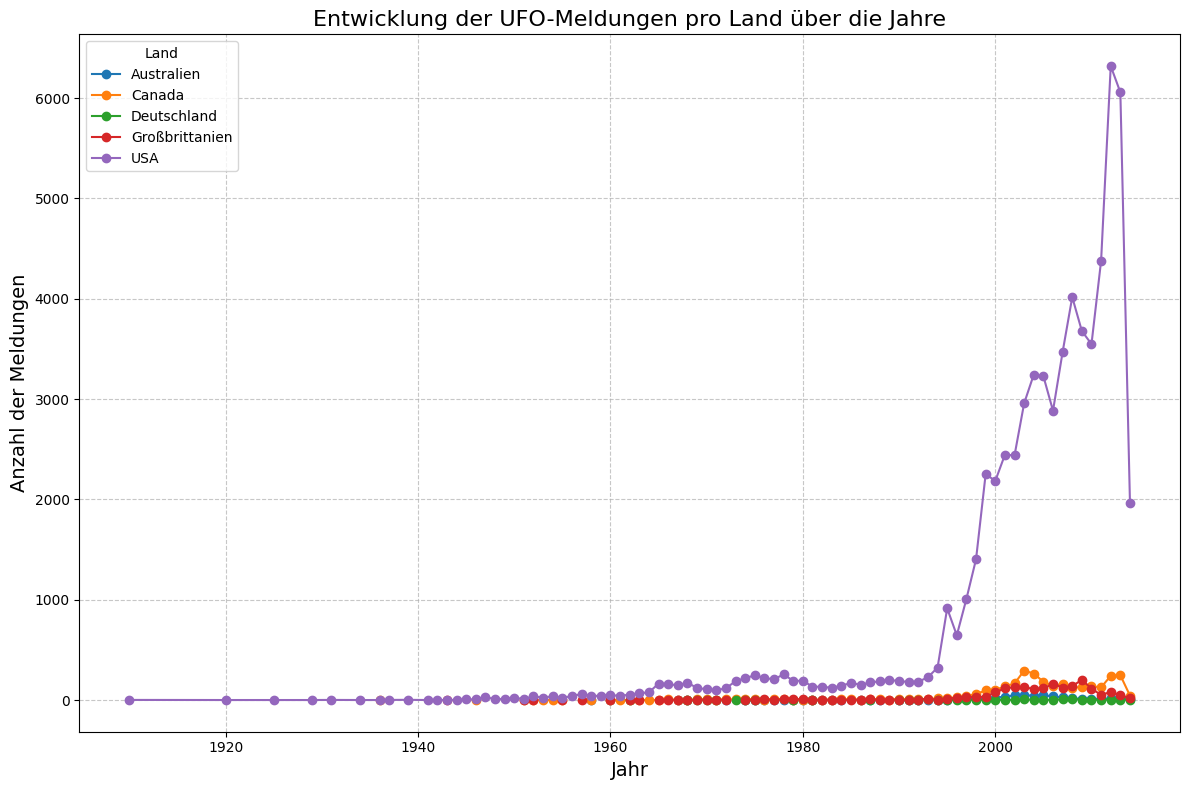

In [178]:
# länder zur leserlichkeit umbenannt
sightings_per_year_country = sightings_per_year_country.rename(columns={
    "au": "Australien",
    "ca": "Canada",
    "gb": "Großbrittanien",
    "de": "Deutschland",
    "us": "USA",
})

# Entwicklung der Meldungen pro Land
sightings_per_year_country.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Entwicklung der UFO-Meldungen pro Land über die Jahre', fontsize=16)
plt.xlabel('Jahr', fontsize=14)
plt.ylabel('Anzahl der Meldungen', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Land')
plt.tight_layout()
plt.show()

In [179]:
### das jetzt als close up für 1900 - 

# filter close up ab 1990
close_up_df = ufo_sightings_df[ufo_sightings_df["years"] >= 1990]

# jahre aus dem gefilterten df ziehen
sightings_close_up_country = close_up_df.groupby(["years", "country"]).size().unstack()

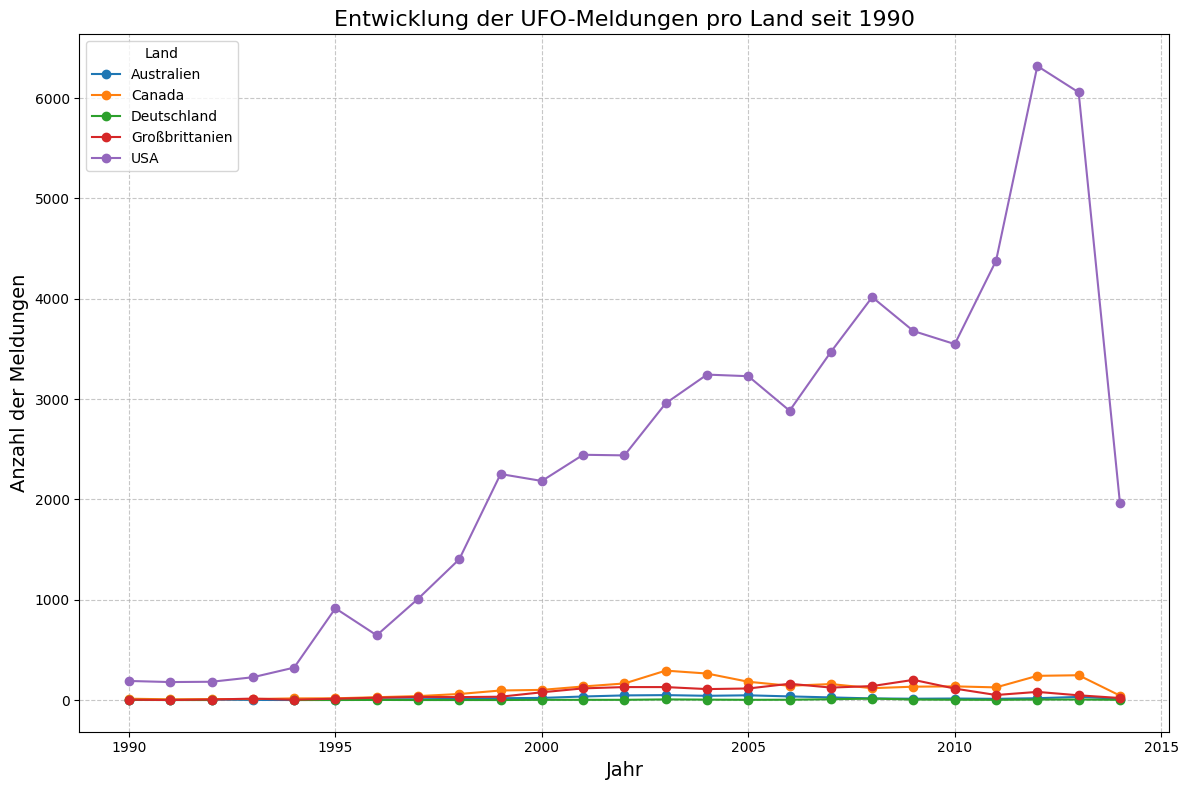

In [180]:
# länder zur leserlichkeit umbenannt
sightings_close_up_country = sightings_close_up_country.rename(columns={
    "au": "Australien",
    "ca": "Canada",
    "gb": "Großbrittanien",
    "de": "Deutschland",
    "us": "USA",
})

# Entwicklung der Meldungen pro Land
sightings_close_up_country.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Entwicklung der UFO-Meldungen pro Land seit 1990', fontsize=16)
plt.xlabel('Jahr', fontsize=14)
plt.ylabel('Anzahl der Meldungen', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Land')
plt.tight_layout()
plt.show()

### UFO-Sichtungen im Kontext von Feiertagen
Frage: Werden UFOs häufiger an bestimmten Feiertagen gesichtet?
Analyse:
Filtere die Daten nach bekannten Feiertagen (z. B. Silvester, Halloween, Weihnachten) und vergleiche die Anzahl der Sichtungen.
Visualisierung:
Balkendiagramm oder Heatmap, das die Sichtungen an Feiertagen gegenüber anderen Tagen zeigt.

In [181]:
import holidays

# Feiertage für die USA in variable packen
us_holidays = holidays.US()
print(us_holidays)



{'country': US, 'expand': True, 'language': None, 'market': None, 'observed': True, 'subdiv': None, 'years': set()}


In [182]:
# USA ziehen
us_sightings = ufo_sightings_df[ufo_sightings_df["country"] == "us"]

# in dt umwandeln
us_sightings["datetime"] = datetime_clean

#datum rausziehen
us_sightings["date"] = us_sightings["datetime"].dt.date

# Zeitraum für die Feiertage
min_date = us_sightings["date"].min()
max_date = us_sightings["date"].max()

# Feiertags-Objekt für  USA
us_holidays = holidays.US(years=range(min_date.year, max_date.year + 1))

# Konvertiere die Feiertage in ein Set für schnellen Abgleich
us_holidays_set = set(us_holidays.keys())

# holiday ja nein
us_sightings["is_holiday"] = us_sightings["date"].isin(us_holidays_set)

# holidayname
us_sightings["holiday_name"] = us_sightings["date"].apply(lambda x: us_holidays.get(x))

# Nur Feiertage
holiday_sightings = us_sightings[us_sightings["is_holiday"]]

# Anzahl der Sichtungen pro Feiertag zählen
holiday_counts = holiday_sightings["holiday_name"].value_counts()
print(holiday_counts)

holiday_name
Independence Day               1082
New Year's Day                  513
Thanksgiving                    217
Christmas Day                   186
Columbus Day                    172
Labor Day                       171
Veterans Day                    162
Memorial Day                    137
Washington's Birthday           133
Martin Luther King Jr. Day      113
New Year's Day (observed)        54
Independence Day (observed)      53
Veterans Day (observed)          49
Christmas Day (observed)         40
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\2675202808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_sightings["datetime"] = datetime_clean
C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\2675202808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_sightings["date"] = us_sightings["datetime"].dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\2675202808.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\3457233637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette="viridis")


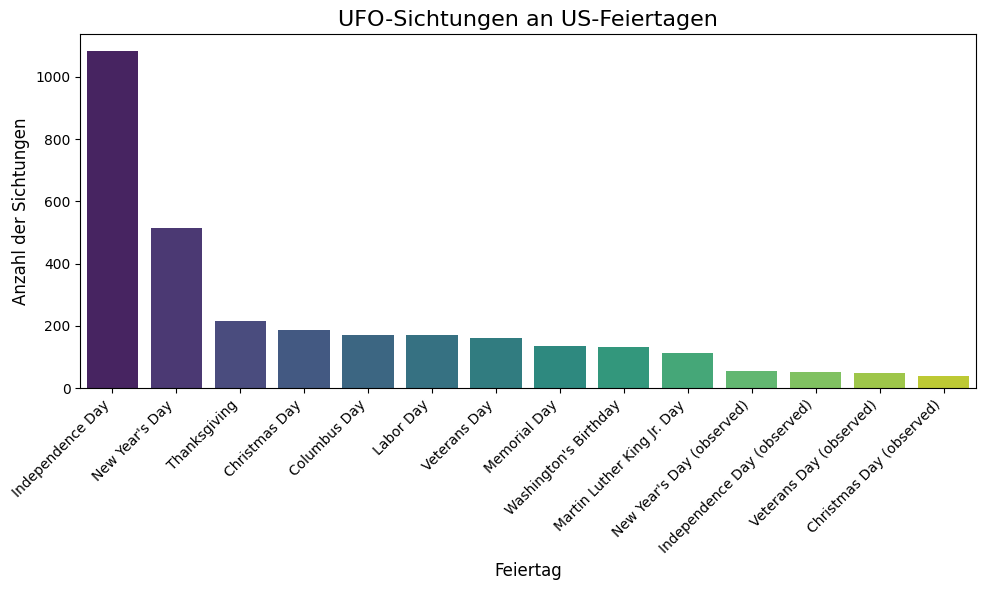

In [183]:
# visualisierung

plt.figure(figsize=(10, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette="viridis")

plt.title("UFO-Sichtungen an US-Feiertagen", fontsize=16)
plt.xlabel("Feiertag", fontsize=12)
plt.ylabel("Anzahl der Sichtungen", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Feiertagsnamen drehen, um Lesbarkeit zu verbessern

plt.tight_layout()
plt.show()

In [184]:
ufo_sightings_df["datetime"] = datetime_clean
ufo_sightings_df["datetime"] = ufo_sightings_df["datetime"].dt.date

### Perseiden

In [185]:
# alle daten verwendbar, da alle auf der nordhalbkugel liegen

# in dt umwandeln
ufo_sightings_df["datetime"] = datetime_clean


# Extrahieren Sie Monat und Tag
ufo_sightings_df["month"] = ufo_sightings_df["datetime"].dt.month
ufo_sightings_df["day"] = ufo_sightings_df["datetime"].dt.day

# Definieren Sie den Zeitraum (17. Juli bis 24. August)
# Juli: Monat = 7, August: Monat = 8
perseiden_zeitraum = ufo_sightings_df[
    ((ufo_sightings_df["month"] == 7) & (ufo_sightings_df["day"] >= 17)) |  # Juli: ab dem 17.
    ((ufo_sightings_df["month"] == 8) & (ufo_sightings_df["day"] <= 24))    # August: bis zum 24.
]

# Zeigen Sie die ersten Zeilen des gefilterten DataFrames an
print(perseiden_zeitraum.head())

                 datetime              city state country     shape  \
57326 2002-07-17 00:00:00          portland    or      us    sphere   
57482 1953-07-17 22:00:00            dublin    in      us      cone   
57483 1960-07-17 22:00:00  bedford (canada)    on      ca      disk   
57484 1963-07-17 09:00:00            boston    ma      us  triangle   
57485 1966-07-17 11:00:00          waukegan    il      us    circle   

       duration_seconds duration_hour_min  \
57326               300            5 min.   
57482              1800        30 minutes   
57483                30     20-30 seconds   
57484              1800        30 minutes   
57485               180             3\min   

                                                comments date_posted  \
57326                        Jets slowly chaising object  2002-07-26   
57482  My brothers farmed after dark&#44 they told my...  2012-07-04   
57483  Iridescent blue light passes over farmer at tr...  2008-06-12   
57484  It was 

C:\Users\Admin\AppData\Local\Temp\ipykernel_2740\4100435291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perseiden_zeitraum["date_str"] = perseiden_zeitraum["datetime"].dt.strftime("%d.%m.")


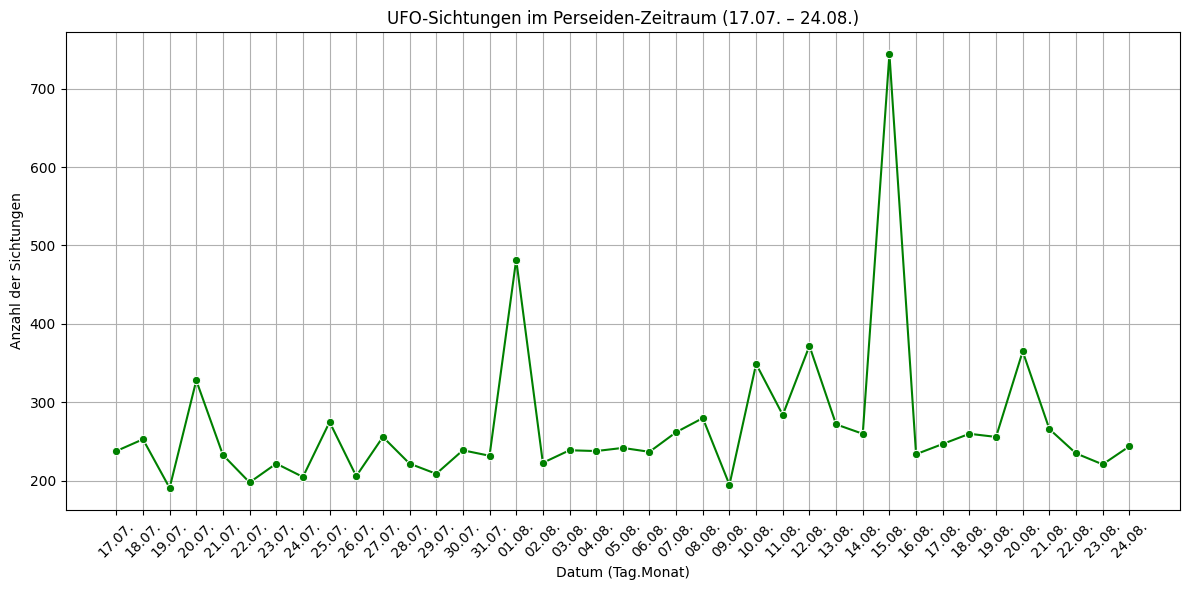

In [186]:
# neue spalte für dt-format "tag.monat" 
perseiden_zeitraum["date_str"] = perseiden_zeitraum["datetime"].dt.strftime("%d.%m.")

# chronologisch 
perseiden_zeitraum = perseiden_zeitraum.sort_values("datetime")

# Zählen der Sichtungen pro Datum
sightings_per_date = perseiden_zeitraum.groupby("date_str").size().reset_index(name="count")
#.reset_index(name="count")
#Serie, die durch .size() erzeugt wurde, wird zurück in einen DataFrame konvertiert
# Dabei wird die Spalte mit den gezählten Werten (Anzahl der Sichtungen) in eine neue Spalte namens "count" umgewandelt.

# Erstellen Sie eine neue Spalte für die Sortierung basierend auf dem datetime-Objekt
sightings_per_date["sort_key"] = pd.to_datetime(sightings_per_date["date_str"], format="%d.%m.")

# Sortieren Sie den DataFrame nach der neuen Sortierschlüsselspalte
sightings_per_date = sightings_per_date.sort_values("sort_key")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="date_str", y="count", data=sightings_per_date, marker="o", color="green")
plt.title("UFO-Sichtungen im Perseiden-Zeitraum (17.07. – 24.08.)")
plt.xlabel("Datum (Tag.Monat)")
plt.ylabel("Anzahl der Sichtungen")

# X-Achse sortieren
plt.xticks(rotation=45)

# Grid
plt.grid(True)
plt.tight_layout()
plt.show()